<a href="https://colab.research.google.com/github/yinglingyang/Data-Science-with-Python/blob/main/Unsupervised_Models_for_Credit_Card_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Models for Credit Card Clustering

## Objectives:

*   Using clustering models to segment credit card customers
*   Visualize customer clustering and evaluate the model performance
*   Understand the behavioral pattern of each customer cluster





## Outline

*   Data description
*   Data exploration
*   Data cleaning and feature engineering
*   Model training and visualization
*   Summary of model training
*   Understand behavioral pattern of each cluster
*   Summary of key findings and insights
*   Suggestions for next steps







## 1 Data Description

Dataset link: https://www.kaggle.com/arjunbhasin2013/ccdata

summary of attributes:

*   CUSTID : Identification of Credit Card holder
*   BALANCE : Balance amount left in their account to make purchases
*   BALANCEFREQUENCY : How frequently the Balance is updated
*   PURCHASES : Amount of purchases made from account
*   ONEOFFPURCHASES : Maximum purchase amount done in one-go
*   INSTALLMENTSPURCHASES : Amount of purchase done in installment
*   CASHADVANCE : Cash in advance given by the user
*   PURCHASESFREQUENCY : How frequently the Purchases are being made
*   ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go 
*   PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done
*   CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
*   CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
*   PURCHASESTRX : Numbe of purchase transactions made
*   CREDITLIMIT : Limit of Credit Card for user
*   PAYMENTS : Amount of Payment done by user
*   MINIMUM_PAYMENTS : Minimum amount of payments made by user
*   PRCFULLPAYMENT : Percent of full payment paid by user
*   TENURE : Tenure of credit card service for user



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/CC GENERAL.csv')

In [5]:
df.shape

(8950, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## 2 Data exploration

### 2.1 Feature Distribution

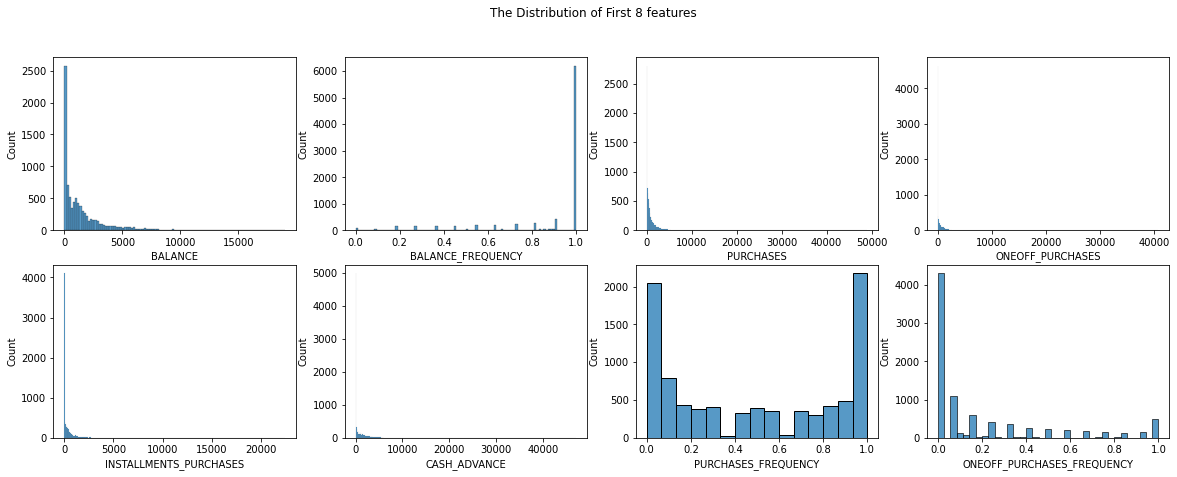

In [8]:
plt.figure(figsize = (20,7))
for i, col in enumerate(df.columns.to_list()[1:9]):
    plt.subplot(2,4,i+1)
    sns.histplot(x=col, data = df)
plt.suptitle('The Distribution of First 8 features')
plt.show()

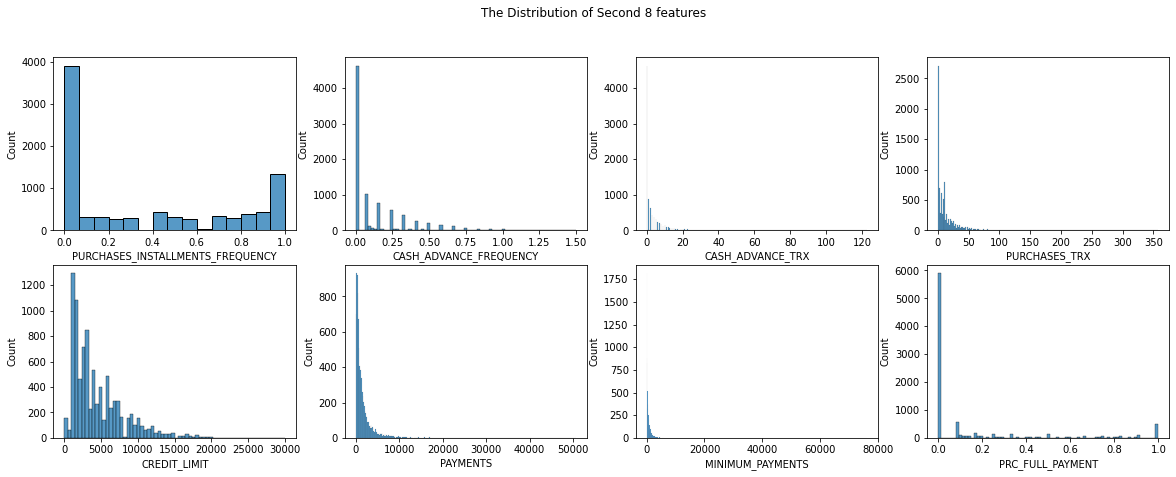

In [9]:
plt.figure(figsize = (20,7))
for i, col in enumerate(df.columns.to_list()[9:17]):
    plt.subplot(2,4,i+1)
    sns.histplot(x=col, data = df)
plt.suptitle('The Distribution of Second 8 features')
plt.show()

In [10]:
skew_limit = 0.75 
skew_vals = df.iloc[:,1:].skew()
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
MINIMUM_PAYMENTS,13.622797
ONEOFF_PURCHASES,10.045083
PURCHASES,8.144269
INSTALLMENTS_PURCHASES,7.299120
PAYMENTS,5.907620
CASH_ADVANCE_TRX,5.721298
CASH_ADVANCE,5.166609
PURCHASES_TRX,4.630655
BALANCE,2.393386
PRC_FULL_PAYMENT,1.942820


**Key finding: Many of features are very skewed. The dataset need to be normalized before model training.**

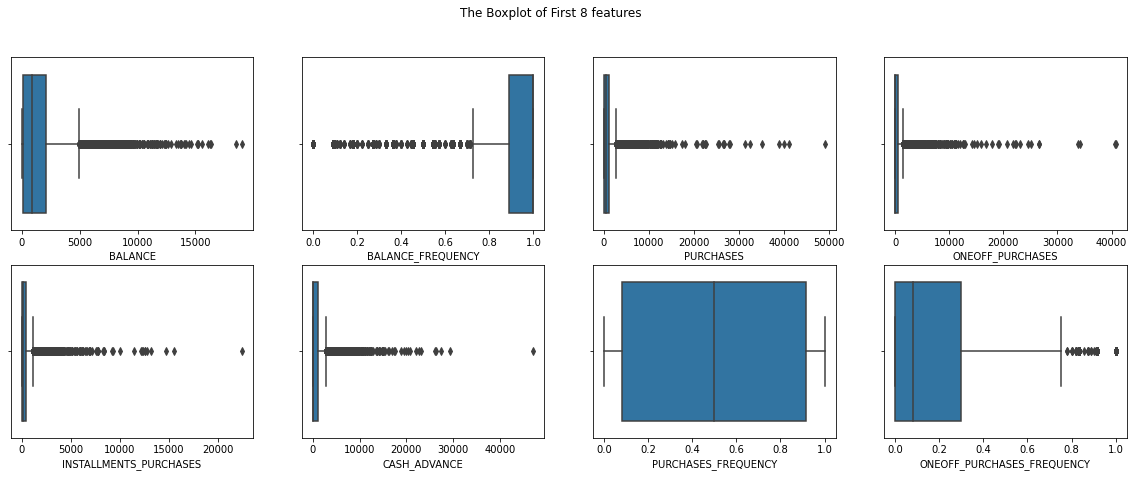

In [11]:
plt.figure(figsize = (20,7))
for i, col in enumerate(df.columns.to_list()[1:9]):
    plt.subplot(2,4,i+1)
    sns.boxplot(x=col, data = df)
plt.suptitle('The Boxplot of First 8 features')
plt.show()

**Key Finding: There are lots of outlier in the dataset. We need keep this in mind before building clustering models.**

### 2.2 Feature Correlation

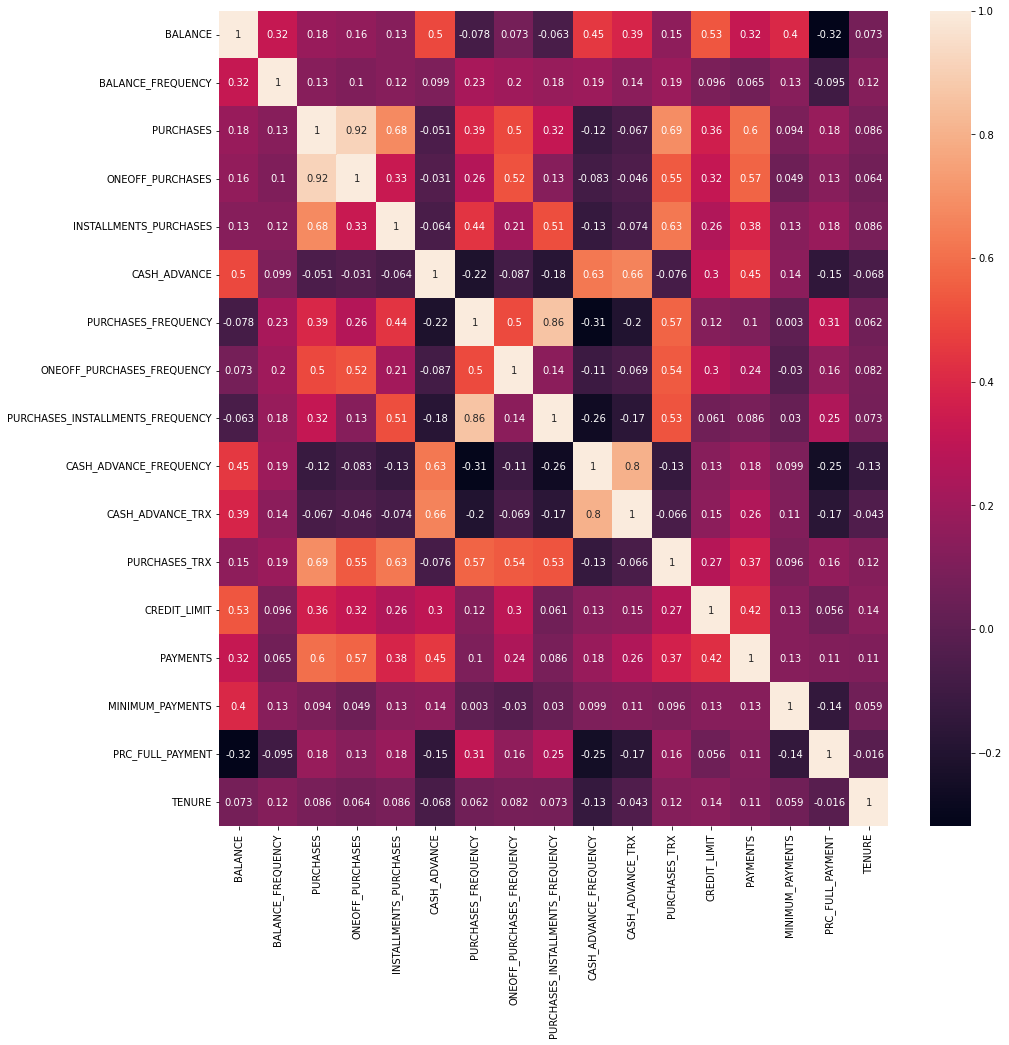

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(df.iloc[:,1:].corr(), annot=True)
plt.show()

In [13]:
corr_mat = df.iloc[:,1:].corr()

# Strip out the diagonal values
for x in range(17):
    corr_mat.iloc[x,x] = 0.0

corr_mat.abs().idxmax()

BALANCE                                                 CREDIT_LIMIT
BALANCE_FREQUENCY                                            BALANCE
PURCHASES                                           ONEOFF_PURCHASES
ONEOFF_PURCHASES                                           PURCHASES
INSTALLMENTS_PURCHASES                                     PURCHASES
CASH_ADVANCE                                        CASH_ADVANCE_TRX
PURCHASES_FREQUENCY                 PURCHASES_INSTALLMENTS_FREQUENCY
ONEOFF_PURCHASES_FREQUENCY                             PURCHASES_TRX
PURCHASES_INSTALLMENTS_FREQUENCY                 PURCHASES_FREQUENCY
CASH_ADVANCE_FREQUENCY                              CASH_ADVANCE_TRX
CASH_ADVANCE_TRX                              CASH_ADVANCE_FREQUENCY
PURCHASES_TRX                                              PURCHASES
CREDIT_LIMIT                                                 BALANCE
PAYMENTS                                                   PURCHASES
MINIMUM_PAYMENTS                  

In [14]:
corr_mat.abs().max().sort_values(ascending=False)

PURCHASES                           0.916845
ONEOFF_PURCHASES                    0.916845
PURCHASES_INSTALLMENTS_FREQUENCY    0.862934
PURCHASES_FREQUENCY                 0.862934
CASH_ADVANCE_FREQUENCY              0.799561
CASH_ADVANCE_TRX                    0.799561
PURCHASES_TRX                       0.689561
INSTALLMENTS_PURCHASES              0.679896
CASH_ADVANCE                        0.656498
PAYMENTS                            0.603264
ONEOFF_PURCHASES_FREQUENCY          0.544869
CREDIT_LIMIT                        0.531283
BALANCE                             0.531283
MINIMUM_PAYMENTS                    0.398684
BALANCE_FREQUENCY                   0.322412
PRC_FULL_PAYMENT                    0.318959
TENURE                              0.139167
dtype: float64

**Key Finding: High correlations are observed between some features, such as 'PURCHASES' and 'ONEOFF_PURCHASES', which means the information inside the dataset is redundant. To accurately group dataset, we need to do the princple components Analysies first.**

## 3 Data Cleaning and Feature Engineering

Actions taken to clean and engineer data:

*   Drop columns without information
*   Fill missing values
*   Scale data by StandardScaler
*   Normalize data by QuantileTransformer
*   Use principal component analysis to do dimensionality reduction






### 3.1 Drop columns without information

In [15]:
df.drop('CUST_ID', axis=1, inplace=True)

### 3.2 Fill missing values

In [16]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [17]:
for col in df.columns:
    if df[col].isnull().sum():
        df[col] = df[col].fillna(df[col].mean())
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### 3.3 Scale data by StandardScaler

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(df)

### 3.4 Normalize data by QuantileTransformer

In [19]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')

data = qt.fit_transform(data)

### 3.5 Use principal component analysis to do dimensionality reduction

In [20]:
from sklearn.decomposition import PCA


pca = PCA(n_components=8)
pca_data = pca.fit_transform(data)
pca_df = pd.DataFrame(pca_data)

In [21]:
pca_df.rename(columns={0: "First component", 1: "Second component"})

,First component,Second component,2,3,4,5,6,7
0,2.144762,-6.918579,-0.367944,-3.029065,2.579350,-3.005569,0.196400,-0.668730
1,-11.207255,-3.149174,-0.294520,4.968411,-2.382013,-2.552411,-0.673252,0.213808
2,4.966355,5.648261,-7.199314,-3.698297,-1.265759,1.589962,3.670448,1.174245
3,-3.856565,4.584438,-4.212218,0.971992,3.376255,-3.996989,2.760003,-0.320156
4,0.616768,1.138791,-6.489124,-4.559196,-1.925636,1.238398,0.828511,-0.199445
...,...,...,...,...,...,...,...,...
8945,5.694998,-6.499169,1.943920,2.482566,3.157839,9.762207,2.059351,-0.097902
8946,4.654717,-4.882639,2.418442,-2.706243,6.319868,8.727112,1.988352,-0.317199
8947,3.235352,-8.938928,-0.847928,4.100267,6.027041,5.730834,-0.671672,-0.523213
8948,-10.978451,-5.677138,-2.290355,6.924980,4.480550,5.288691,-0.671926,1.981495


In [22]:
pca.explained_variance_ratio_

array([0.44158103, 0.16712761, 0.13435959, 0.08291416, 0.0657027 ,
       0.04335966, 0.02089504, 0.01320916])

In [23]:
pca.explained_variance_ratio_.sum()

0.9691489486153005

**Key findlings: 96.9% information is encoded in the first 8 components. 8 dimensions are enough to train clustering models. After dimensionality reduction, the speeds and accurencies of models are significantly improved.**

## 4 Model Training and Visualization

Clustering models used in this project:

*   KMeans
*   Agglomerative Clustering (Ward)
*   Agglomerative Clustering (Single)
*   Agglomerative Clustering (Complete)
*   DBSCAN
*   Mean Shift



### 4.1 Find best cluster number using elbow method

In [24]:
from sklearn.cluster import KMeans

km_list = list()

for clust in range(1,16):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(pca_df)
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))


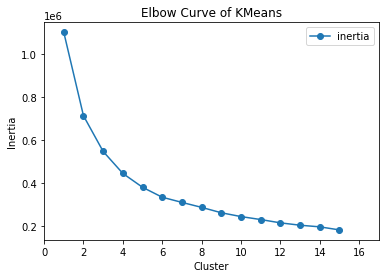

In [26]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,17,2))
ax.set_xlim(0,17)
ax.set(xlabel='Cluster', ylabel='Inertia')
ax.set_title('Elbow Curve of KMeans')
plt.show()

**Key Finding: the best cluster number is 5**

### 4.2 Model training

In [27]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5)
km = km.fit(pca_df)

In [28]:
from sklearn.cluster import AgglomerativeClustering

agg_ward = AgglomerativeClustering(n_clusters=5, linkage='ward', compute_full_tree=True)
agg_ward = agg_ward.fit(pca_df)

In [29]:
from sklearn.cluster import AgglomerativeClustering

agg_single = AgglomerativeClustering(n_clusters=6, linkage='single', compute_full_tree=True)
agg_single = agg_single.fit(pca_df)

In [30]:
from sklearn.cluster import AgglomerativeClustering

agg_complete = AgglomerativeClustering(n_clusters=5, linkage='complete', compute_full_tree=True)
agg_complete = agg_complete.fit(pca_df)

In [32]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=7.1, min_samples=300)
dbscan = dbscan.fit(pca_df)
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4]), array([ 223, 1765, 2042, 2794, 1757,  369]))

In [33]:
from sklearn.cluster import MeanShift

ms = MeanShift(bandwidth=7.7, bin_seeding=True, min_bin_freq=2)
ms = ms.fit(pca_df)
np.unique(ms.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([2043, 2603, 1852, 1791,  386,  275]))

### 4.3 Model visualization

In [34]:
pca_df['KMeans'] = km.labels_
pca_df['Agg_Ward'] = agg_ward.labels_
pca_df['Agg_Single'] = agg_single.labels_
pca_df['Agg_Complete'] = agg_complete.labels_
pca_df['DBSCAN'] = dbscan.labels_
pca_df['Mean_Shift'] = ms.labels_

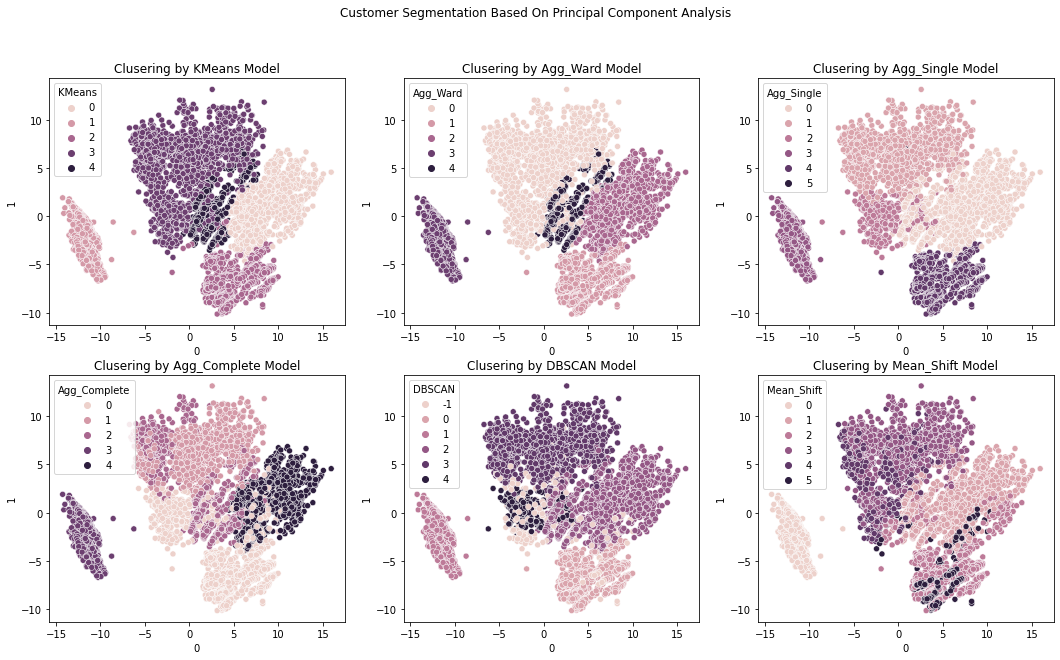

In [35]:
model_list = ['KMeans','Agg_Ward','Agg_Single','Agg_Complete','DBSCAN','Mean_Shift']

plt.figure(figsize = (18,10))
for i, model in enumerate(model_list):
    plt.subplot(2,3,i+1)
    sns.scatterplot(x=0, y=1, hue = model, data = pca_df)
    plt.title("Clusering by {} Model".format(model))
plt.suptitle('Customer Segmentation Based On Principal Component Analysis')
plt.show()

### Compare the cluster assignment of different models

In [36]:
pca_df[['KMeans','Agg_Ward']].groupby(['KMeans','Agg_Ward']).size().to_frame()

0
KMeans Agg_Ward      
0      2         1751
1      3         2043
2      0            9
       1         1800
3      0         2270
4      2            6
       4         1071

**Similarity between KMeans and Agg_Ward: 1-(9+6)/8950 = 99.8%**

In [37]:
pca_df[['DBSCAN','Agg_Single']].groupby(['DBSCAN','Agg_Single']).size().to_frame()

0
DBSCAN Agg_Single      
-1     0             34
       1             62
       2             91
       4             35
       5              1
 0     4           1765
 1     2              1
       3           2041
 2     0           2794
 3     1           1757
 4     2            369

**Similarity between DBSCAN and Agg_Single: 1-(1+1+35+62+34)/8950 = 98.5%**

In [41]:
pca_df[['KMeans','Agg_Single']].groupby(['KMeans','Agg_Single']).size().to_frame()

0
KMeans Agg_Single      
0      0           1751
1      2              2
       3           2041
2      2              9
       4           1800
3      1           1819
       2            450
       5              1
4      0           1077

**Cluster 3 of KMeans is splited into two clusters in Agg_Single method (cluster 1 and cluster 2)**

In [42]:
pca_df[['Agg_Single','KMeans']].groupby(['Agg_Single','KMeans']).size().to_frame()

0
Agg_Single KMeans      
0          0       1751
           4       1077
1          3       1819
2          1          2
           2          9
           3        450
3          1       2041
4          2       1800
5          3          1

**Cluster 0 of Agg_Single is splited into two clusters in KMeans method (cluster 0 and cluster 4)**

## 5 Summary of Model Training


*   Customer Dataset is sucessfully segmented into 5 clusters by KMeans, Agg_Ward, Agg_Single and DBSCAN. Cluster shapes and cluster boundaries are well defined. Agg_Complete and MeanShift didn't do a good job.
*   The clustering result of KMeans agrees with the result of Agg_Ward. The similarity between KMeans and Agg_Ward is as high as 99.8%. (Assigned labels are diffent in diffent model) 
*   The clustering result of DBSCAN agrees with the result of Agg_Single. The similarity between DBSCAN and Agg_Single is as high as 98.5%.
*   The clustering results of KMeans and Agg_Ward are significantly different from the results of DBSCAN and Agg_Single. 
*   Cluster 3 of KMeans is splited into  two clusters in Agg_Single method (cluster 1 and cluster 2)
*   Cluster 0 of Agg_Single is splited into  two clusters in KMeans method (cluster 0 and cluster 4) 

## 6 Understand Behavioral Pattern of Each Cluster

In [38]:
for model in model_list:
  df[model] = pca_df[model]

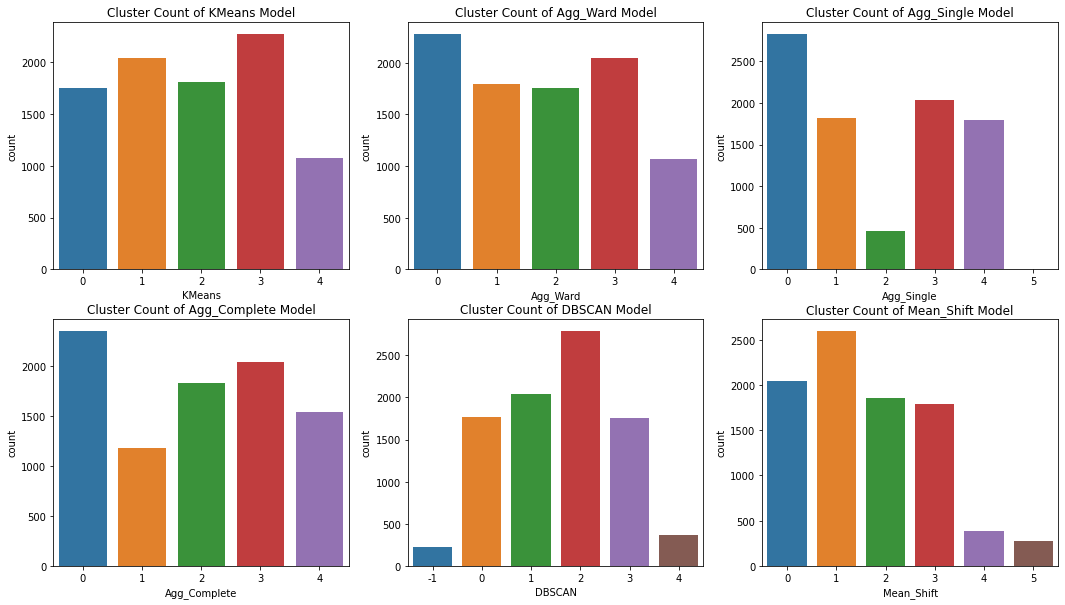

In [40]:
plt.figure(figsize = (18,10))
for i, model in enumerate(model_list):
    plt.subplot(2,3,i+1)
    sns.countplot(x=model, data = df)
    plt.title("Cluster Count of {} Model".format(model))
plt.show()

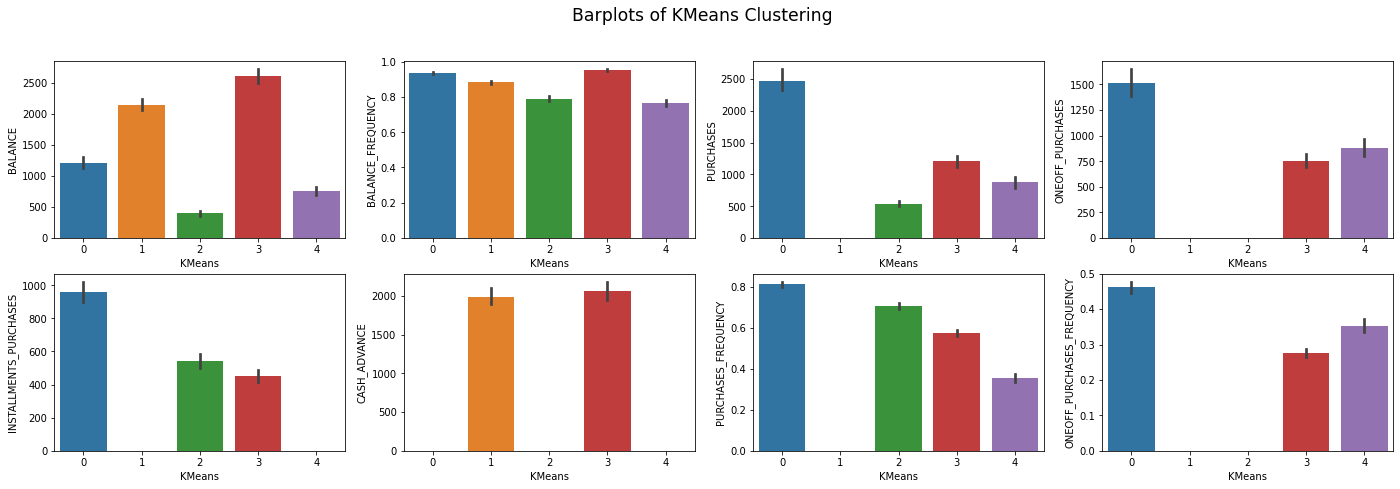

In [49]:
plt.figure(figsize = (24,15))
for i, col in enumerate(df.columns.to_list()[:8]):
    plt.subplot(4,4,i+1)
    sns.barplot(x='KMeans', y = col, data = df)
plt.suptitle('Barplots of KMeans Clustering', y=0.93, fontsize='xx-large')
plt.show()

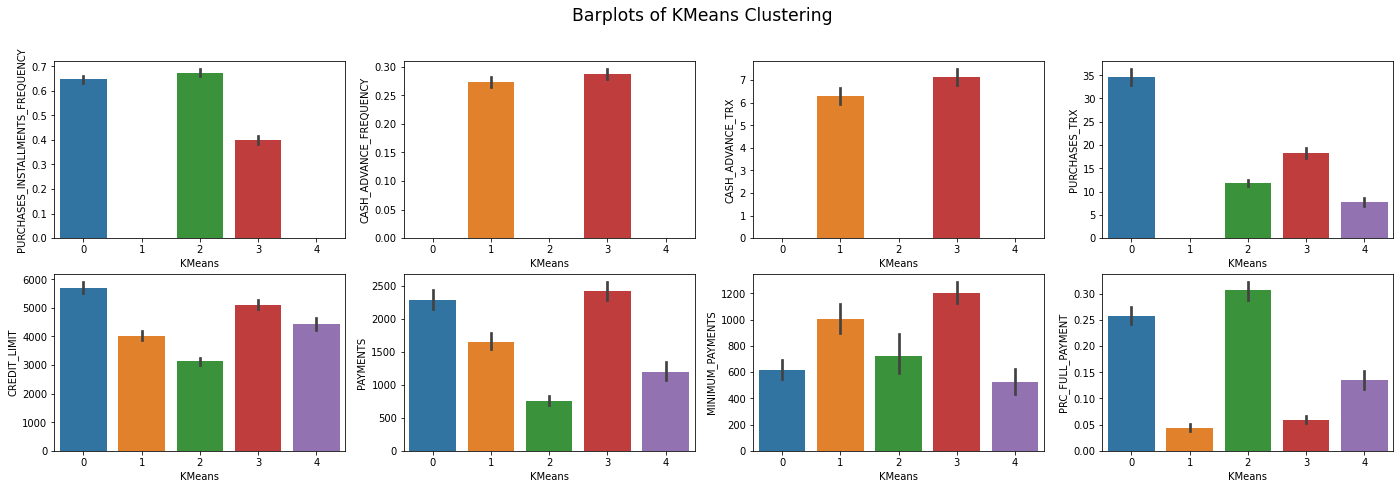

In [50]:
plt.figure(figsize = (24,15))
for i, col in enumerate(df.columns.to_list()[8:16]):
    plt.subplot(4,4,i+1)
    sns.barplot(x='KMeans', y = col, data = df)
plt.suptitle('Barplots of KMeans Clustering', y=0.93, fontsize='xx-large')
plt.show()

**Behavioral Pattern of KMeans Clustering**:

*   group 0: up-middle payments, middle balance, highest purchases, high full payment
*   group 1: middle payments, up-middle balance, lowest purchases, high cash advance, low full payment
*   group 2: lowest payments, lowest balance, down-middle purchases, high full payment
*   group 3: highest payments, highest balance, up-middle purchases, high cash advance, low full payment
*   group 4: down-middle payments, down-middle balance, middle purchases, middle full payment






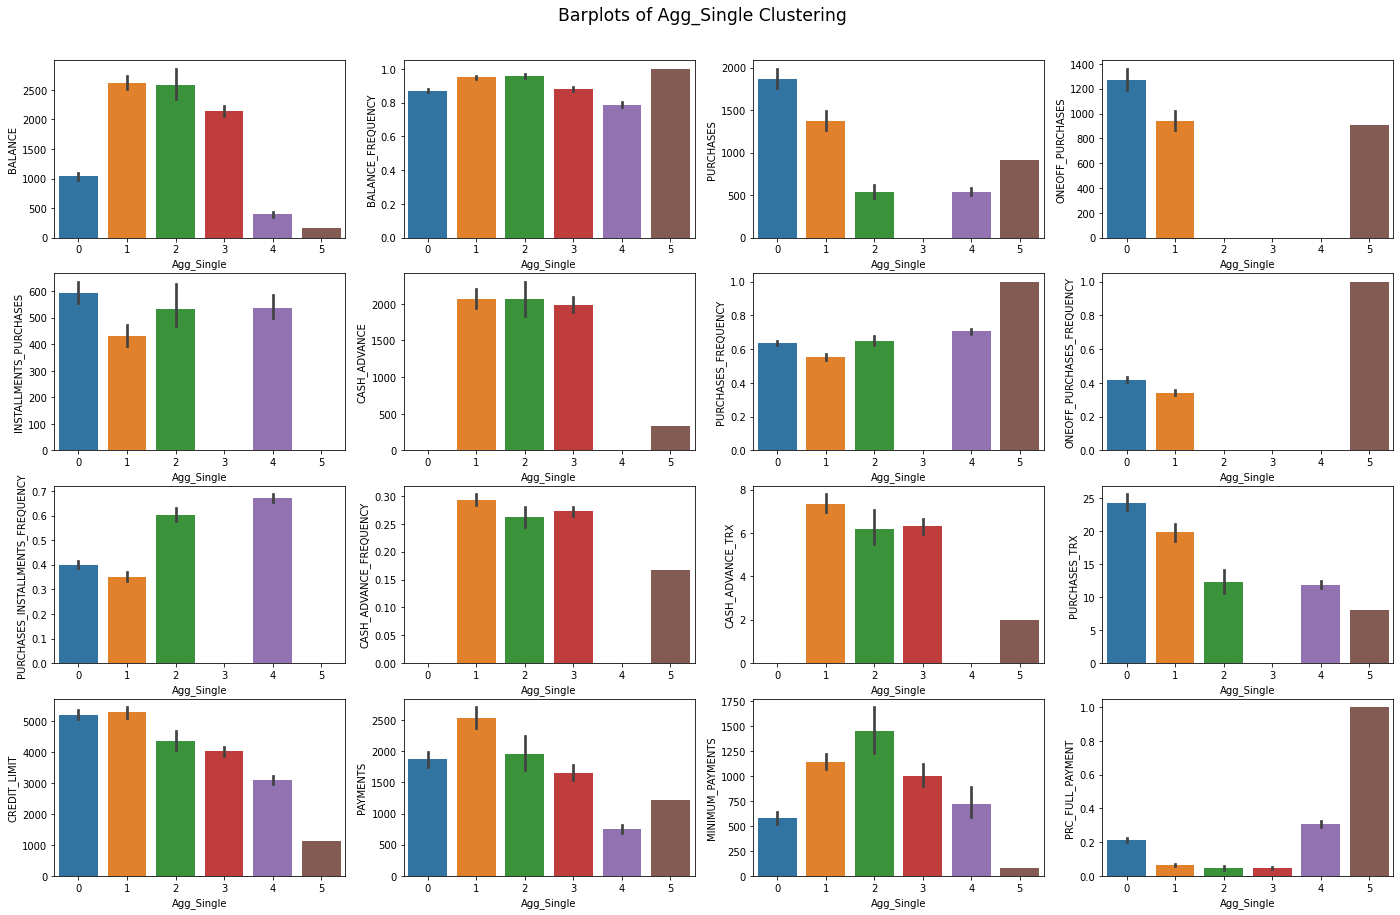

In [51]:
plt.figure(figsize = (24,15))
for i, col in enumerate(df.columns.to_list()[:16]):
    plt.subplot(4,4,i+1)
    sns.barplot(x='Agg_Single', y = col, data = df)
plt.suptitle('Barplots of Agg_Single Clustering', y=0.93, fontsize='xx-large')
plt.show()

**Outlier of Agg_Single clustering**:

*  The behavor of the cluster 5 in Agg_Single (only 1 count) is very different from other customers: extremely low banlance, extremely low credit limit, highest purchases frequency. Something is fishy here.

## 7 Summary of Key Findings and Insights



*   Best models for clustering this dataset are KMeans and Agg_Ward
*   Agg_Single and DBSCAN are also good for clustering this dataset
*   Agg_Single and DBSCAN are more sensitive to detecting the outliers
*   These models highly agree with each other
*   Principal component analysis is important for the accuracy and stability of clustering models.







## 8 Suggestions for Next Steps



*   The dataset is not big enough, more data are needed in the future 
*   The principal component analysis shows only 8 features matters. More independent features are needed to collected and added in the dataset in the future 

